<a href="https://colab.research.google.com/github/whitefreeze/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 2 

## Connect to Data

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt			
import seaborn as sns
import numpy as np

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Data
filename = '/content/drive/MyDrive/Data Science/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'
df = pd.read_csv(filename)

In [4]:
# Inspect Data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Inspect Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

* Explore the data - what do you need to do to clean this data? Clean it!

### Rows & Columns

1. How many rows and columns?

In [6]:
# display the number of rows and columns in the dataframe
df.shape

(8523, 12)

* There are 8,523 rows and 12 columns

### Datatypes

2. What are the datatypes of each variable?

In [7]:
# Display the column names and datatypes for each
# Columns with strings or mixed datatypes are identified as an object for the datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

* The data type for each column includes integers, floats and objects

### Duplicates

3. Are there duplicates? If so, drop any duplicates.

In [8]:
## Show number of duplicate rows in the dataset
df.duplicated().sum()

0

* There are no duplicated rows in the dataset

### Identify Missing Values

4. Identify missing values.

In [9]:
# Method 1
# check data types and non-null values using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* The following have non-null values: 

1.   Item_weight
2.   Outlet_Size



In [10]:
# Method 2
# identify missing values directly using .isnull().sum()
df.isnull().sum()	

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Same results, but displayed more clearly.

### Address Missing Values

5. Decide on how to address the missing values and then do it.

#### Item_Weight

Weight of product

In [11]:
# Create filter for null Item_Weight values
filter_itemweight = df['Item_Weight'].isnull()
filter_itemweight.value_counts(normalize=True)

False    0.828347
True     0.171653
Name: Item_Weight, dtype: float64

* Item_Weight contains 17.17% null values. 

* Seems a little high to delete those observations (over 5%), but a little low to delete the entire column (not over 50%)

* This column is numerical, so any imputed values must also be numerical. 

* Let's look at the descriptive statistics:

In [12]:
# include median, as it is not included in .describe results
print(f"median     {df['Item_Weight'].median()}")
# descriptive statistics for the column Item_Weight
df['Item_Weight'].describe(include="number")

median     12.6


count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
# Calculate the percent difference between Item_Weight mean and median
percent_diff = ((12.857645 - 12.6) / ((12.857645 + 12.6)/2)) * 100
print(f"The percent difference between Item_Weight's mean and median is {round(percent_diff, 2)}%")

The percent difference between Item_Weight's mean and median is 2.02%


To address the 17% of null values in the Item_Weight column, I will opt to resolve this issue by imputing the missing values using the median value of the column for the following reasons:

* The median value works well with small datasets like this one.

* This method is less affected by outliers than using the 'mean' method.

* The percent difference between the mean and median is 2%, which will minimize the difference in results from using either one over the other. 

In [14]:
# Replace null values in Item_Weight with the median value of the column: 12.6
df['Item_Weight'].fillna(value = 12.6, inplace = True)

In [15]:
# Verify that there are no more null values in Item_Weight
df['Item_Weight'].isnull().sum()

0

* All null values in Item_Weight have been addressed and replaced with the median value of the column: 12.6

#### Outlet_Size

In [16]:
# Create filter for null Outlet_Size values
filter_outletsize = df['Outlet_Size'].isnull()
filter_outletsize.value_counts(normalize=True)

False    0.717236
True     0.282764
Name: Outlet_Size, dtype: float64

* Outlet_Size contains 28.28% null values. This is in a similar range to what Item_Weight was. Let's take a look at what kind of data type Outlet_Size is.

In [17]:
# Find Outlet_Size data type
display(df['Outlet_Size'].value_counts())
print()
df['Outlet_Size'].value_counts(normalize=True)

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

We can see that the data type in  Outlet_Size is categorical: ordinal. 

* Note that 45% is Medium, 39% is Small, and only 15% is High.

* As 28% null-values is fairly significant, yet not over 50%, I recommend we use the median value of Outlet_Size (which is Medium, which is the mean of Sizes, itself)

In [18]:
# Verify what the mean value of Outlet_Size is
df['Outlet_Size'].describe(include='object')

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

* Verified that Medium is the median value in Outlet_Size.

In [19]:
# Replace null values in Outlet_Size with Medium
df['Outlet_Size'].fillna('Medium', inplace = True)

# Verify that there are no more null values in Outlet_Size
df['Outlet_Size'].isnull().sum()

0

### Verify Missing Values Addressed

6. Confirm that there are no missing values after addressing them.

In [20]:
# Let's run our tests again!

# Verify that there are no more null values in Item_Weight
df['Item_Weight'].isnull().sum()

0

In [21]:
# Verify that there are no more null values in Outlet_Size
df['Outlet_Size'].isnull().sum()

0

* Confirmed: neither **Item_Weight** *nor* **Outlet_Size** have any missing values

### Find & Fix Inconsistent Categories

7. Find and fix any inconsistent categories of data.

* Let's try to go through the columns to see if we can find any inconsistent categories of data

In [22]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Numerical Discrete Categories

##### Outlet_Establishment_Year

The year in which each store was established

In [23]:
# Look at number of values and evaluate data.
display(df['Outlet_Establishment_Year'].value_counts())
# Count number of unique values
df['Outlet_Establishment_Year'].nunique()
# Numerical Discrete data

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

9

* No errors noted. Data shows years of stores' establishment and all look reasonable years for a supermarket/grocery store. In one year, two different store locations opened. 

##### Item_Outlet_Sales

Sales of the product in the particular store. This is the target variable to be predicted.

In [24]:
# Evaluate data values
df['Item_Outlet_Sales'].value_counts()
# Appears to be Numerical Continuous, but should more likely be Numerical Discrete (and categorizing as such)

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [25]:
# Look at Item_Outlet_Sales to check min & max values
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


* No specific error noted outside of the non-discrete values included.
* Item_Outlet_Sales are just sales of an item at a particular location and values can vary widely "hot items" to "poor sellers". 
The values are positive, so that looks fine. 
* However, it is curious how the number of items sold are not discrete values. I am puzzled as to how fractions of a unit can be sold. I would recommend checking that these values are correct with a Subject Matter Expert.  
* I will categorize this group as Numerical Discrete for now (as that's what I would expect it to be) and follow-up with the SME.

#### Numerical Continuous Categories

##### Item_Weight

Weight of product

In [26]:
# Look at the value counts for Item_Weight to see if anything stands out
df['Item_Weight'].value_counts()

12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64

In [27]:
# Double check the descriptive statistics of the column to get another perspective on the data
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

Everything seems to be normal and fits well within normal ranges for these numerical values. 

* No errors noted.

##### Item_Visibility

The percentage of total display area of all products in a store allocated to the particular product

In [28]:
# Display descriptive statistics for the numeric columns
# Notice Item_Visibility
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
# Let's see the values for Item_Visibility
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

* Values seem resonable outside of the 526 zero values. Otherwise, not noticing any outliers for Item_Visibility. A Subject Matter Expert should be asked to verify if zero is a reasonable value for this category.

##### Item_MRP

Item_MRP is the Maximum Retail Price of the product sold at grocery stores or supermarkets.



In [30]:
# Look at the data stats for Item_MRP
df.describe()
# Numerical Continuous

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


From the descriptive stats above, the min is 31.29 and max is 266.88. For products sold at a grocery stores, that seems high is the monetary unit is US Dollars.

The min value is eight times lower than the max value. If the cheapest grocery item is 2 USD, then the most expensive item would be $16 USD. 

Those values are possible, but do not seem to account for cheap items like gum at the checkout area or more expensive items like meat or cakes in specialty departments. Will need to consult a Subject Matter Expert to better understand whether or not those values are reasonable.

Without an SME, these values seem to lack any outliers and reasonable enough to move on for now.

#### Categorical Nominal Categories

##### Item_Identifier

Unique product ID

In [31]:
# Look at the data values
df['Item_Identifier'].value_counts()
# Categorical Nominal data

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

* No error noted. 
* The maximum value for a single Item_Identifier is 10, which matches the number of unique stores as seen in Outlet_Identifier. This is reasonable. 
* The number of unique values (1559) also seems reasonable as the distinct products sold across 10 separate grocery stores can be quite a few (and 1559 is not an exorbitant value, either) 

##### Item_Fat_Content

Whether the product is low fat or regular

In [32]:
# Let's see what we have for Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Looks like we should only have two categories instad of five. Let's combine the correlating categories:

In [33]:
# Change 'LF' to 'Low Fat'
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)

# Verify 'LF' replaced
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
# Change 'low fat' to 'Low Fat'
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)

# Verify 'low fat' replaced
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [35]:
# Change 'reg' to 'Regular'
df['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)

# Verify 'reg' replaced
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

* Item_Fat_Content  had duplicate data with different value names combined into the actual two categories that are represented

##### Outlet_Identifier

Unique store ID

In [36]:
# Determine Data Type for Outlet_Identifier
df['Outlet_Identifier'].value_counts()
# Categorical Nominal

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [37]:
df['Outlet_Identifier'].nunique()
# dataset includes data from 10 unique stores

10

* Values in Outlet_Identifier look reasonable and represent the number of items sold at each of the included grocery stores.

##### Item_Type

The category to which the product belongs

In [38]:
# Verify if the product categories look reasonable for Item_Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

* Product categories do indeed look reasonable. No errors noted.

#### Categorical Ordinal Categories

##### Outlet_Size

The size of the store in terms of ground area covered

In [39]:
# Evaluate data values
df['Outlet_Size'].value_counts()
# Categorical Ordinal

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

* "High" does not seem to match the same format as "Small" and "Medium". May need to check with a Subject Matter Expert to see if "High" should be changed to "Large" or if "High" is the correct term for where the data was collected, but for now, will proceed and change value to "Large" to reduce confusion.

In [40]:
# Change Outlet_Size value "High" to "Large"
df.Outlet_Size = df.Outlet_Size.replace('High', 'Large')
df.Outlet_Size.value_counts()

Medium    5203
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

* The "High" value in Outlet_Size has successfully been replaced with "Large."

##### Outlet_Location_Type

The type of area in which the store is located

In [41]:
# Evaluate Data values
df['Outlet_Location_Type'].value_counts()
# Categorical Ordinal

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

* No error noted. Values seem reasonable.

##### Outlet_Type

Whether the outlet is a grocery store or some sort of supermarket

In [42]:
# Evaluate data values
df['Outlet_Type'].value_counts()
# Categorical Ordinal

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

* No errors noted. This category seems to correlate with Outlet_Size.

### Summary Statistics for Numerical Data

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [43]:
# Find summary statistics for Numerical categoeries.
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


8.1 For any categorical columns, obtain the summary statistics of each.

In [44]:
# Find summary statistics for Categorical categoeries.
df.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,5203,3350,5577


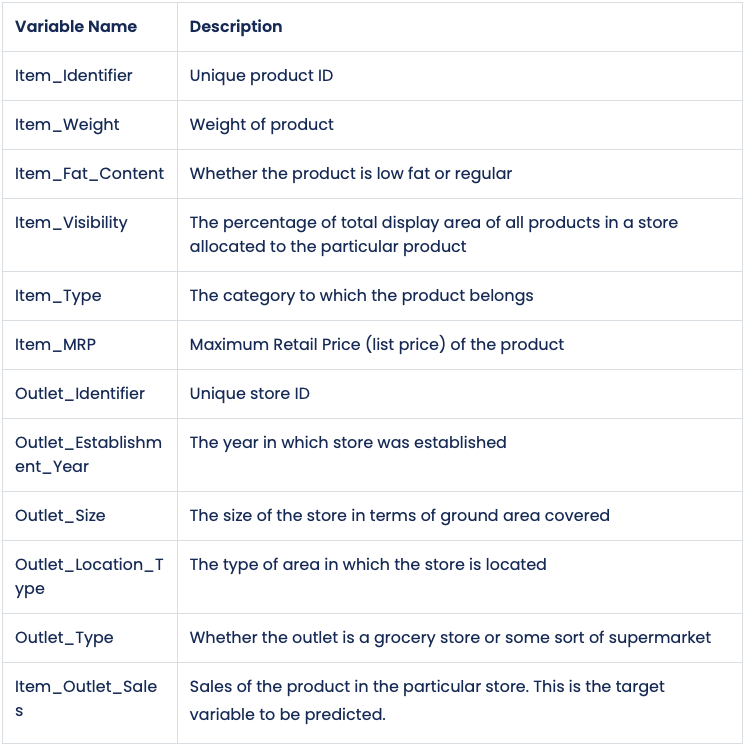

## Statistical Analyses
Understand, explain, and model the data. 

In [45]:
# Set corr 
corr = df.corr()

In [46]:
# display head for reference
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052


In [47]:
# display info for reference
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Numerical Discrete Categories

#### Outlet_Establishment_Year
Describe the column to view the summary statistics.

In [48]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

View the counts for each value in the column.

In [49]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Visualize the data.

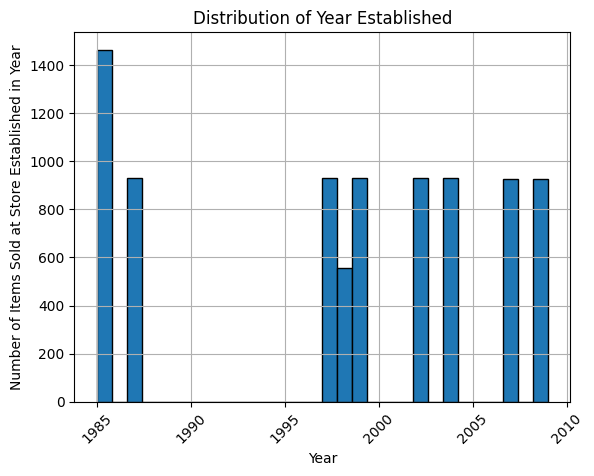

In [50]:
ax = df['Outlet_Establishment_Year'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation=45)
ax.ticklabel_format(style='plain');
ax.set_title('Distribution of Year Established')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Items Sold at Store Established in Year');

* A histogram counting the total number of items being sold at all stores established in a particular year.
* This visualization does not seem to be useful.
* A better visualization would show the year each store was established.

### Numerical Continuous Categories

#### Item_Weight
Describe the column to view the summary statistics.

In [51]:
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

Visualize the data.

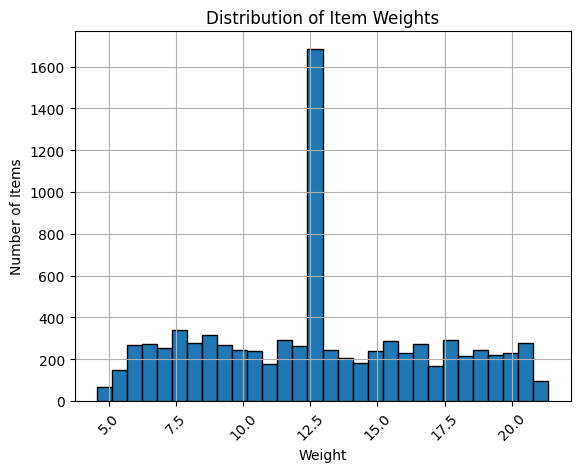

In [52]:
ax = df['Item_Weight'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation=45)
ax.ticklabel_format(style='plain');
ax.set_title('Distribution of Item Weights')
ax.set_xlabel('Weight')
ax.set_ylabel('Number of Items');

* The number of items with a weight of 12.5 seems to be about 6-7 times greater than the average weight of all other items sold.

#### Item_Visibility
Describe the column to view the summary statistics.

In [53]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Visualize the data.

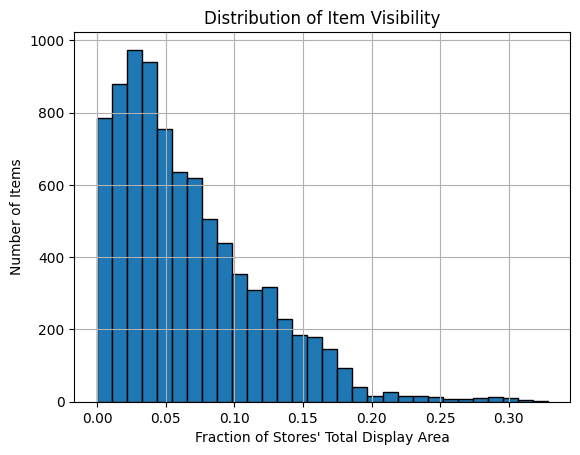

In [54]:
ax = df['Item_Visibility'].hist(bins=30, edgecolor = 'black')
ax.set_title('Distribution of Item Visibility')
ax.set_ylabel('Number of Items')
ax.set_xlabel("Fraction of Stores' Total Display Area");

* Most items sold fall between 0% to 5%. All other ranges of 5% blocks decrease steadily until around 20% where the number of items with large shares of display area are minimal.  

#### Item _MRP
Describe the column to view the summary statistics.

In [55]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

Visualize the data.

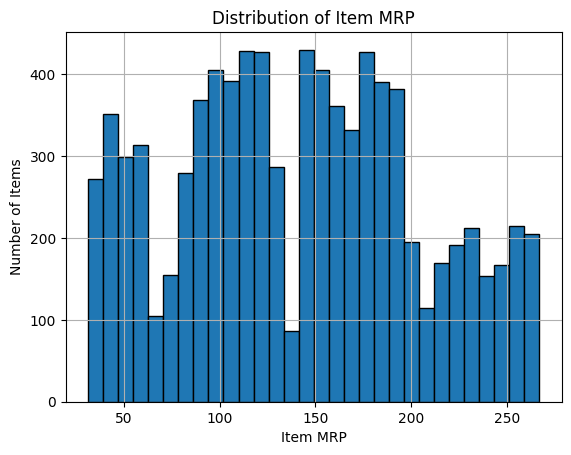

In [56]:
ax = df['Item_MRP'].hist(bins=30, edgecolor = 'black')
ax.set_title('Distribution of Item MRP')
ax.set_ylabel('Number of Items')
ax.set_xlabel("Item MRP");

* There appears to four sections of item prices: Cheap. Medium. High. Very High.
* Between each section there is a small but fairly distint gap between them. 

#### Item_Outlet_Sales
Compare sales between each store.

Visualize the data.

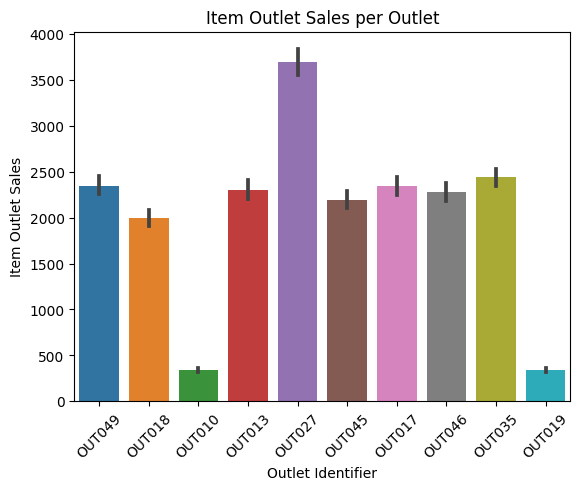

In [57]:
ax = sns.barplot(data=df, y='Item_Outlet_Sales', x='Outlet_Identifier')
ax.tick_params(axis='x', rotation=45)
ax.set_title('Item Outlet Sales per Outlet')
ax.set_xlabel('Outlet Identifier')
ax.set_ylabel('Item Outlet Sales');

* Two stores had very little in sales.
* One store had approximately 50% more sales than the typical competitor.

Insight:
* Need to see why the three outliers performed so drastically different.

* Test for correlation between other available data in dataset: 
 * Store location
 * Store size
 * Store type
 * Store opening year

#### Correlations

See if there are any correlations between numeric features.

Visualize the data.

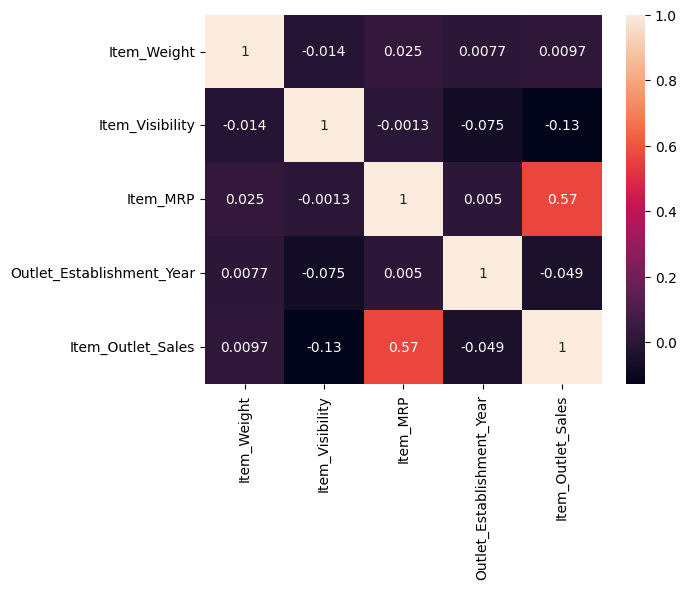

In [58]:
# display seaborn heatmap of numerical features
sns.heatmap(corr, annot = True);

* We can see that there is a positive and "moderate" correlation between the Item_MRP (Maximum Retail Price) and the Item_Outlet_Sales (Sales of a product in a particular store). 

Insight:
* The higher the price of an item, the better its overall sales are.

### Categorical Nominal

#### Low Fat vs Regular
Compare sales for Regular/Low Fat items at each store location.

Visualize the data.

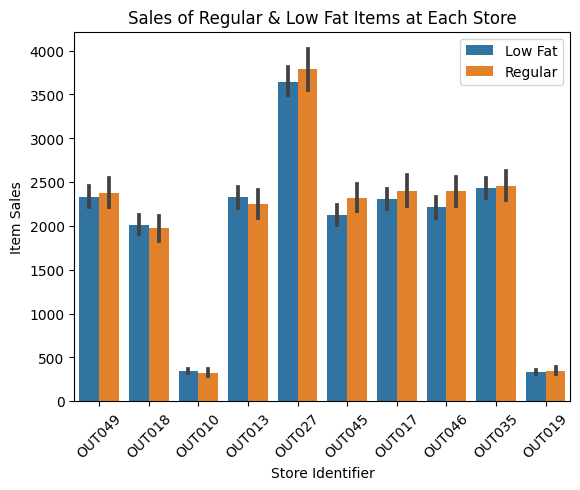

In [59]:
ax = sns.barplot(data=df, y='Item_Outlet_Sales', x='Outlet_Identifier', hue='Item_Fat_Content')
ax.legend(loc='upper right')
ax.tick_params(axis='x', rotation=45)
ax.set_title('Sales of Regular & Low Fat Items at Each Store')
ax.set_xlabel('Store Identifier')
ax.set_ylabel('Item Sales');

* Sales between Low Fat & Regular items are sold about equally at each store.
Insight:
* It seems important to carry both Regular and Low Fat items.

#### Item Type
Compare sales for each product category.

Visualize the data.

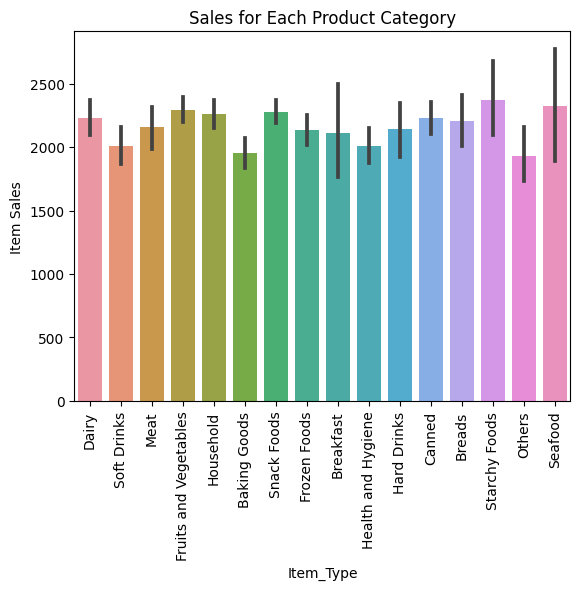

In [60]:
ax = sns.barplot(data=df, y='Item_Outlet_Sales', x='Item_Type')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Sales for Each Product Category')
ax.set_ylabel('Item Sales');

* Sales between each category seem to be fairly even overall. 
* No particular category should be removed from inventory due to poor sales.
* No particular category should be expanded drastically due to exceptionally high sales.

### Categorical Ordinal

#### Store Location Type

Visualize the data.

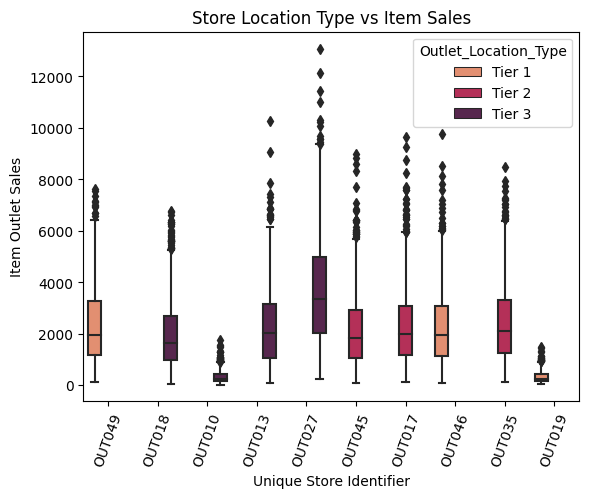

In [61]:
ax = sns.boxplot(data=df, 
                 x='Outlet_Identifier', y='Item_Outlet_Sales', 
                 hue='Outlet_Location_Type', hue_order = ['Tier 1','Tier 2','Tier 3'], palette='rocket_r')
ax.set(
    title='Store Location Type vs Item Sales',
    xlabel='Unique Store Identifier',
    ylabel='Item Outlet Sales'
    )
ax.tick_params(axis='x', rotation=70);

* There does not seem to be any correlation between the store's location type and it's item sales.

#### Store Type & Location Type

Visualize the data.

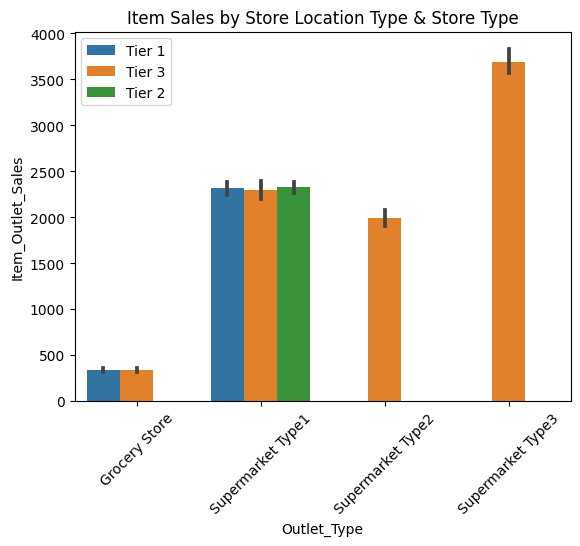

In [62]:
#  
ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', order=['Grocery Store', 'Supermarket Type1','Supermarket Type2','Supermarket Type3']) 
ax.legend(loc='upper left')
ax.set(title='Item Sales by Store Location Type & Store Type')
ax.tick_params(axis='x', rotation=45)

* Grocery Stores, regardless of location type, have much lower item sales than any type of supermarket.
* Supermarket Type3 has the highest item sales. This appears to be independant from the location type, as item sales at Tier 3 locations covers the full range of item sales (from min, to max with most around the graph's mean value) in this dataset.

#### Store Location, Type & Size

Visualize the data.

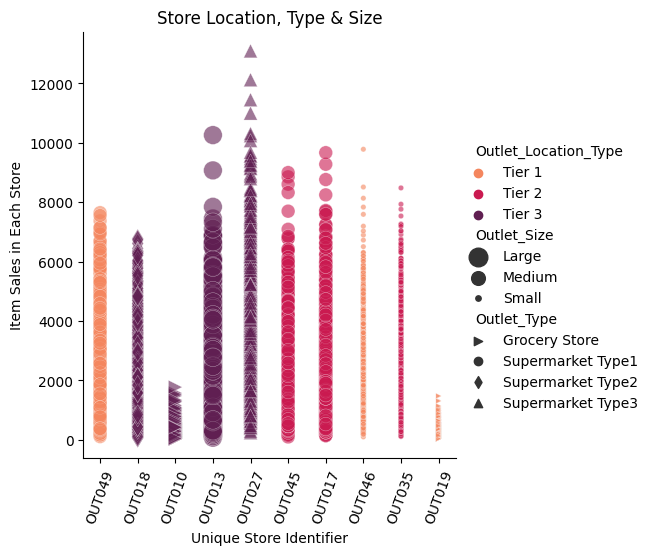

In [63]:
ax = sns.relplot(data=df, 
                 x='Outlet_Identifier', y='Item_Outlet_Sales', 
                 hue='Outlet_Location_Type', hue_order = ['Tier 1','Tier 2','Tier 3'], palette='rocket_r', 
                 size='Outlet_Size', size_order = ['Large', 'Medium', 'Small'], markers=['>','o','d','^'],
                 style='Outlet_Type', style_order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
                 sizes= (15, 180), alpha= 0.60)
ax.set_axis_labels('Unique Store Identifier','Item Sales in Each Store')
ax.set(title='Store Location, Type & Size')
ax.tick_params(axis='x', rotation=70);

Despite being a bit overly-complicated, we can notice the following in regards to store location, type and size:
* The outlet size does not correlate to item sales, at all.
* Outlet location type does not correlate to item sales. 
* Outlet Supermarket Types 1 & 2 do not correlate to item sales.
* Outlet type "Grocery Store" does correlate to low item sales, as there are two stores of that type included in this dataset.
* Outlet type "Supermarket Type3" does correlate to higher item sales, but there is only one store of that type included in the dataset.

A "value_counts" query on the "Outlet_Identifier" column will verify that OUT013 is the only "Large" outlet in the dataset.

In [64]:
df.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT010             Medium         555
OUT013             Large          932
OUT017             Medium         926
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT045             Medium         929
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

## Explanatory Visualizations

We will look further into the relationship between Item Outlet Sales and Item MRP.

### Scatter Plot for Item_Outlet_Sales against Item_MRP

The scatterplot below shows that as Item MRP increases there is a positive correlation with Item Outlet Sales.

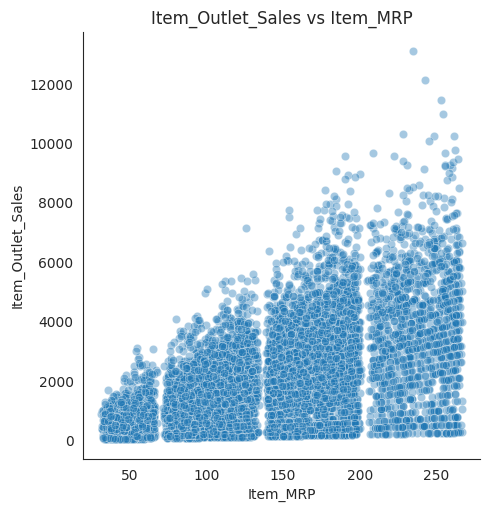

In [76]:
ax = sns.relplot(data=df, 
                 x='Item_MRP', y='Item_Outlet_Sales', 
                 sizes= (15, 180), alpha= 0.40)
ax.set_axis_labels('Item_MRP','Item_Outlet_Sales')
ax.set(title='Item_Outlet_Sales vs Item_MRP')
ax.tick_params(axis='x', rotation=0);

### Scatter Plot Showing how  Item_Visibility relates to Item_Outlet_Sales per Food category

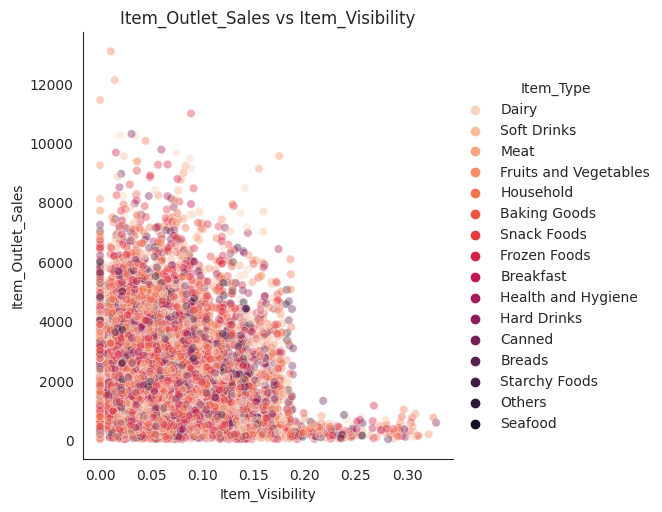

In [79]:
ax = sns.relplot(data=df, 
                 x='Item_Visibility', y='Item_Outlet_Sales', 
                 hue='Item_Type', palette='rocket_r', 
                 sizes= (15, 180), alpha= 0.40)
ax.set_axis_labels('Item_Visibility','Item_Outlet_Sales')
ax.set(title='Item_Outlet_Sales vs Item_Visibility')
ax.tick_params(axis='x', rotation=0);